In [1]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00359/NewsAggregatorDataset.zip

--2023-06-07 18:26:25--  https://archive.ics.uci.edu/ml/machine-learning-databases/00359/NewsAggregatorDataset.zip
archive.ics.uci.edu (archive.ics.uci.edu) をDNSに問いあわせています... 128.195.10.252
archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443 に接続しています... 接続しました。
HTTP による接続要求を送信しました、応答を待っています... 200 OK
長さ: 29224203 (28M) [application/x-httpd-php]
`NewsAggregatorDataset.zip' に保存中

NewsAggregatorDatas 100%[===================>]  27.87M  2.12MB/s 時間 12s        

2023-06-07 18:26:37 (2.33 MB/s) - `NewsAggregatorDataset.zip' へ保存完了 [29224203/29224203]



In [2]:
!unzip NewsAggregatorDataset.zip

Archive:  NewsAggregatorDataset.zip
  inflating: 2pageSessions.csv       
   creating: __MACOSX/
  inflating: __MACOSX/._2pageSessions.csv  
  inflating: newsCorpora.csv         
  inflating: __MACOSX/._newsCorpora.csv  
  inflating: readme.txt              
  inflating: __MACOSX/._readme.txt   


## 50. データの入手・整形
News Aggregator Data Setをダウンロードし、以下の要領で学習データ（train.txt），検証データ（valid.txt），評価データ（test.txt）を作成せよ．

1. ダウンロードしたzipファイルを解凍し，readme.txtの説明を読む．
2. 情報源（publisher）が”Reuters”, “Huffington Post”, “Businessweek”, “Contactmusic.com”, “Daily Mail”の事例（記事）のみを抽出する．
3. 抽出された事例をランダムに並び替える．
4. 抽出された事例の80%を学習データ，残りの10%ずつを検証データと評価データに分割し，それぞれtrain.txt，valid.txt，test.txtというファイル名で保存する．ファイルには，１行に１事例を書き出すこととし，カテゴリ名と記事見出しのタブ区切り形式とせよ（このファイルは後に問題70で再利用する）．

学習データと評価データを作成したら，各カテゴリの事例数を確認せよ．

### 1. ダウンロードしたzipファイルを解凍し，readme.txtの説明を読む．

読んだ

### 2. 情報源（publisher）が”Reuters”, “Huffington Post”, “Businessweek”, “Contactmusic.com”, “Daily Mail”の事例（記事）のみを抽出する．

In [72]:
import pandas as pd
news = pd.read_csv('data/newsCorpora.csv', sep='\\t', header=None)
news.head()

/var/folders/t5/ff5r2wqs7d5bs7x64ntk0lm80000gn/T/ipykernel_68216/3798667375.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  news = pd.read_csv('data/newsCorpora.csv', sep='\\t', header=None)


,0,1,2,3,4,5,6,7
0,1,"Fed official says weak data caused by weather,...",http://www.latimes.com/business/money/la-fi-mo...,Los Angeles Times,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.latimes.com,1394470370698
1,2,Fed's Charles Plosser sees high bar for change...,http://www.livemint.com/Politics/H2EvwJSK2VE6O...,Livemint,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.livemint.com,1394470371207
2,3,US open: Stocks fall after Fed official hints ...,http://www.ifamagazine.com/news/us-open-stocks...,IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,1394470371550
3,4,"Fed risks falling 'behind the curve', Charles ...",http://www.ifamagazine.com/news/fed-risks-fall...,IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,1394470371793
4,5,Fed's Plosser: Nasty Weather Has Curbed Job Gr...,http://www.moneynews.com/Economy/federal-reser...,Moneynews,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.moneynews.com,1394470372027


In [73]:
news = pd.DataFrame(news.values, columns=('ID \t TITLE \t URL \t PUBLISHER \t CATEGORY \t STORY \t HOSTNAME \t TIMESTAMP').split(' \t '))
news.head()

,ID,TITLE,URL,PUBLISHER,CATEGORY,STORY,HOSTNAME,TIMESTAMP
0,1,"Fed official says weak data caused by weather,...",http://www.latimes.com/business/money/la-fi-mo...,Los Angeles Times,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.latimes.com,1394470370698
1,2,Fed's Charles Plosser sees high bar for change...,http://www.livemint.com/Politics/H2EvwJSK2VE6O...,Livemint,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.livemint.com,1394470371207
2,3,US open: Stocks fall after Fed official hints ...,http://www.ifamagazine.com/news/us-open-stocks...,IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,1394470371550
3,4,"Fed risks falling 'behind the curve', Charles ...",http://www.ifamagazine.com/news/fed-risks-fall...,IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,1394470371793
4,5,Fed's Plosser: Nasty Weather Has Curbed Job Gr...,http://www.moneynews.com/Economy/federal-reser...,Moneynews,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.moneynews.com,1394470372027


In [74]:
extracted_news = news[news['PUBLISHER'].isin(['Reuters', 'Huffington Post', 'Businessweek', 'Contactmusic.com', 'Daily Mail'])]
extracted_news.head(10)

,ID,TITLE,URL,PUBLISHER,CATEGORY,STORY,HOSTNAME,TIMESTAMP
12,13,Europe reaches crunch point on banking union,http://in.reuters.com/article/2014/03/10/eu-ba...,Reuters,b,dPhGU51DcrolUIMxbRm0InaHGA2XM,in.reuters.com,1394470501755
13,14,ECB FOCUS-Stronger euro drowns out ECB's messa...,http://in.reuters.com/article/2014/03/10/ecb-p...,Reuters,b,dPhGU51DcrolUIMxbRm0InaHGA2XM,in.reuters.com,1394470501948
19,20,"Euro Anxieties Wane as Bunds Top Treasuries, S...",http://www.businessweek.com/news/2014-03-10/ge...,Businessweek,b,dPhGU51DcrolUIMxbRm0InaHGA2XM,www.businessweek.com,1394470503148
20,21,Noyer Says Strong Euro Creates Unwarranted Eco...,http://www.businessweek.com/news/2014-03-10/no...,Businessweek,b,dPhGU51DcrolUIMxbRm0InaHGA2XM,www.businessweek.com,1394470503366
29,30,REFILE-Bad loan triggers key feature in ECB ba...,http://in.reuters.com/article/2014/03/10/euroz...,Reuters,b,dPhGU51DcrolUIMxbRm0InaHGA2XM,in.reuters.com,1394470505070
30,31,UPDATE 1-ECB to reveal bad loan hurdles for eu...,http://in.reuters.com/article/2014/03/10/euroz...,Reuters,b,dPhGU51DcrolUIMxbRm0InaHGA2XM,in.reuters.com,1394470505314
35,36,Central banks must contain threats from low pr...,http://www.reuters.com/article/2014/03/10/us-e...,Reuters,b,dPhGU51DcrolUIMxbRm0InaHGA2XM,www.reuters.com,1394470506238
36,37,UPDATE 1-Central banks must contain threat fro...,http://in.reuters.com/article/2014/03/10/ecb-n...,Reuters,b,dPhGU51DcrolUIMxbRm0InaHGA2XM,in.reuters.com,1394470506431
37,38,ECB's Noyer says 'not happy' with euro's rise,http://in.reuters.com/article/2014/03/10/ecb-n...,Reuters,b,dPhGU51DcrolUIMxbRm0InaHGA2XM,in.reuters.com,1394470506642
54,55,"EBay rejects Icahn board nominees, asks invest...",http://www.reuters.com/article/2014/03/10/us-e...,Reuters,b,dxyGGb4iN9Cs9aMZTKQpJeoiQfruM,www.reuters.com,1394470921709


### 3. 抽出された事例をランダムに並び替える．

In [75]:
extracted_news = extracted_news.sample(frac=1)
extracted_news.head(10)

,ID,TITLE,URL,PUBLISHER,CATEGORY,STORY,HOSTNAME,TIMESTAMP
380208,380209,Google's Elite 'Project Zero' Aims To Fight Ha...,http://www.huffingtonpost.com/2014/07/15/googl...,Huffington Post,t,dGxUStKlvl7M3_M4sfejoM1pVcaqM,www.huffingtonpost.com,1405486245083
132855,132856,Classic-style car that could replace Central P...,http://www.dailymail.co.uk/news/article-260723...,Daily Mail,t,db4pgI2UOnhX0MMro2cnCYXfDxouM,www.dailymail.co.uk,1397828272962
117276,117277,Coca-Cola First-Quarter Results Soothe Angst A...,http://www.businessweek.com/news/2014-04-15/co...,Businessweek,b,dtGvpP7nKa5iPhMgZRDrpLz4c-xhM,www.businessweek.com,1397579445976
338020,338021,Shia Labeouf - Shia LaBeouf sent Cabaret DVD a...,http://www.contactmusic.com/story/shia-labeouf...,Contactmusic.com,e,dSxCH6eKHibCnTML3kb-li9KO9EUM,www.contactmusic.com,1404173326092
196881,196882,UK Stocks Rise to Two-Month High as Barclays G...,http://www.businessweek.com/news/2014-05-08/u-...,Businessweek,b,dmfYAYOSCXeIgdMeNy_RGzRlSo-4M,www.businessweek.com,1399625754388
130511,130512,Katie Holmes pulls on her sexiest mini dress a...,http://www.dailymail.co.uk/tvshowbiz/article-2...,Daily Mail,e,d5UsmDphxH0tE_MUoWfxcxDdHp1-M,www.dailymail.co.uk,1397775634354
10851,10852,"Kim Kardashian Steals Kylie Jenner's Bikini, P...",http://www.huffingtonpost.com/2014/03/12/kim-k...,Huffington Post,e,dgrugNy8JhKGJpM4mzHwu-gX3uV9M,www.huffingtonpost.com,1394717924366
306025,306026,UPDATE 2-SNB says ready to act as needed in wa...,http://www.reuters.com/article/2014/06/19/swis...,Reuters,b,dweCGAGMEP5sb_MJ58Wqp08O1SX3M,www.reuters.com,1403193582881
334290,334291,UPDATE 3-Philips spins off lighting components...,http://in.reuters.com/article/2014/06/30/phili...,Reuters,b,dI3EP3IzprskODMxEwzY-q51E3JWM,in.reuters.com,1404146167025
191555,191556,Fannie Mae Will Pay US $5.7 Billion After Firs...,http://www.businessweek.com/news/2014-05-08/fa...,Businessweek,b,dyVST1xzahgTA3MVWTM5glZxwJXWM,www.businessweek.com,1399555324349


### 4. 抽出された事例の80%を学習データ，残りの10%ずつを検証データと評価データに分割し，それぞれtrain.txt，valid.txt，test.txtというファイル名で保存する．ファイルには，１行に１事例を書き出すこととし，カテゴリ名と記事見出しのタブ区切り形式とせよ（このファイルは後に問題70で再利用する）．
学習データと評価データを作成したら，各カテゴリの事例数を確認せよ．

In [76]:
from sklearn.model_selection import train_test_split

train_data, valid_test_data = train_test_split(extracted_news[['TITLE', 'CATEGORY']], test_size=0.2, shuffle=True, random_state=42)    # 42はあるSF小説の有名な数字で、深い意味はないらしい
valid_data, test_data = train_test_split(valid_test_data, test_size=0.5, shuffle=True, random_state=42)

train_data.to_csv('work/train_data.txt', sep='\t', index=False, header=None)
valid_data.to_csv('work/valid_data.txt', sep='\t', index=False, header=None)
test_data.to_csv('work/test_data.txt', sep='\t', index=False, header=None)

In [77]:
!wc -l work/*_data.txt

  1336 work/test_data.txt
 10684 work/train_data.txt
  1336 work/valid_data.txt
 13356 total


## 51. 特徴量抽出
学習データ，検証データ，評価データから特徴量を抽出し，それぞれtrain.feature.txt，valid.feature.txt，test.feature.txtというファイル名で保存せよ． なお，カテゴリ分類に有用そうな特徴量は各自で自由に設計せよ．記事の見出しを単語列に変換したものが最低限のベースラインとなるであろう．

In [78]:
# より良い特徴量は余裕があったら探す
from sklearn.feature_extraction.text import CountVectorizer   # tf-idfよりこっちの方が性能が良かった.理由は？？
vectorizer = CountVectorizer(stop_words='english')

train_X = vectorizer.fit_transform(train_data['TITLE'])  # fit_transform()はfit()とtransform()を同時に行う, fit は語彙の獲得やidfの計算をする
valid_X = vectorizer.transform(valid_data['TITLE'])    # transform はfitで獲得した語彙やidfを使って文書をtf-idfのベクトルにする, 
test_X = vectorizer.transform(test_data['TITLE'])

print(train_X.shape, valid_X.shape, test_X.shape)
print(train_X[0])
print(train_X.toarray())

(10684, 12528) (1336, 12528) (1336, 12528)
  (0, 10729)	1
  (0, 4756)	1
  (0, 3682)	1
  (0, 5966)	1
  (0, 11628)	1
  (0, 2691)	1
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [79]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_tfidf = TfidfVectorizer(stop_words='english')

tfidf_train_X = vectorizer_tfidf.fit_transform(train_data['TITLE'])
tfidf_valid_X = vectorizer_tfidf.transform(valid_data['TITLE'])
tfidf_test_X = vectorizer_tfidf.transform(test_data['TITLE'])

In [80]:
!head -1 work/train_data.txt

US STOCKS-Futures drop as Iraq turmoil continues	e


In [81]:
print(train_X[0])
vectorizer.inverse_transform(train_X[0])

  (0, 10729)	1
  (0, 4756)	1
  (0, 3682)	1
  (0, 5966)	1
  (0, 11628)	1
  (0, 2691)	1


[array(['stocks', 'futures', 'drop', 'iraq', 'turmoil', 'continues'],
       dtype='<U27')]

In [82]:
print(train_X[0].toarray())
vectorizer.inverse_transform(train_X[0].toarray())

[[0 0 0 ... 0 0 0]]


[array(['continues', 'drop', 'futures', 'iraq', 'stocks', 'turmoil'],
       dtype='<U27')]

In [83]:
import numpy as np

# np.savetxt と np.loadtxt だと、テキストファイルに配列を保存したり、読み込んだりすることができるらしい

np.savetxt('train_X.feature.txt', train_X.toarray())
np.savetxt('valid_X.feature.txt', valid_X.toarray())
np.savetxt('test_X.feature.txt', test_X.toarray())

In [84]:
l = np.loadtxt('train_X.feature.txt')
l

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [85]:
print(vectorizer.inverse_transform(l[:1]))

[array(['continues', 'drop', 'futures', 'iraq', 'stocks', 'turmoil'],
      dtype='<U27')]


In [86]:
# 保存場所間違えた…
!mv *.feature.txt work/

### 52. 学習
51で構築した学習データを用いて，ロジスティック回帰モデルを学習せよ．

In [87]:
from sklearn.linear_model import LogisticRegression
# ロジスティック回帰モデルのインスタンスを作成
model = LogisticRegression(max_iter=1000)

# 説明変数Xを作成
train_X = np.loadtxt('work/train_X.feature.txt')
# 目的変数yを作成
train_y = train_data['CATEGORY']

# ロジスティック回帰モデルの重みを学習
model.fit(train_X, train_y)

LogisticRegression(max_iter=1000)

In [88]:
model_tfidf = LogisticRegression()

# 説明変数Xを作成
train_X = tfidf_train_X
# 目的変数yを作成
train_y = train_data['CATEGORY']

# ロジスティック回帰モデルの重みを学習
model_tfidf.fit(tfidf_train_X, train_y)

/Users/nozueshinnosuke/.pyenv/versions/3.10.5/envs/100knock/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [89]:
print(model.score(train_X, train_y))

0.8982590789966305


In [90]:
print(model_tfidf.score(tfidf_train_X, train_y))

0.9499251216772744


### 53. 予測
52で学習したロジスティック回帰モデルを用い，与えられた記事見出しからカテゴリとその予測確率を計算するプログラムを実装せよ．

In [91]:
class LogisticRegressionClassifier:
    def __init__(self, model):
        self.model = model

    def classify(self, test_X):
        predict = self.model.predict(test_X)
        probabillity = self.model.predict_proba(test_X)
        return predict, probabillity

In [92]:
LogisticRegressionClassifier(model).classify(train_X[:6])

(array(['e', 'e', 'e', 'e', 'b', 'b'], dtype=object),
 array([[0.40398505, 0.51580032, 0.03564107, 0.04457356],
        [0.21631439, 0.43336441, 0.23161584, 0.11870536],
        [0.13332434, 0.7565899 , 0.03956112, 0.07052464],
        [0.23508427, 0.37921539, 0.04400687, 0.34169347],
        [0.63435718, 0.23132128, 0.06195439, 0.07236715],
        [0.50872968, 0.29277668, 0.07097638, 0.12751726]]))

In [93]:
LogisticRegressionClassifier(model_tfidf).classify(train_X[:6])

(array(['b', 'e', 'e', 't', 'b', 'b'], dtype=object),
 array([[0.86871736, 0.09834423, 0.01577045, 0.01716797],
        [0.16849449, 0.42619732, 0.2918242 , 0.11348398],
        [0.15089755, 0.73438172, 0.04115017, 0.07357057],
        [0.10224678, 0.16619859, 0.02566155, 0.70589309],
        [0.82116597, 0.09232262, 0.04152927, 0.04498214],
        [0.61037099, 0.19096317, 0.072385  , 0.12628083]]))

In [94]:
!head -6 work/train_data.txt

US STOCKS-Futures drop as Iraq turmoil continues	e
Mother left with gaping hole in cheek and no jawbone after Kazakh doctors  ...	m
UPDATE 2-Prolific US character actor Eli Wallach dies at 98 - NYT	e
Apple now has access to Beats streaming music service allowing it to compete  ...	t
US forces hand over seized oil tanker to Libya: agency	b
US Federal Reserve Meeting Minutes for June 18 (Text)	b


### 54. 正解率の計測
52で学習したロジスティック回帰モデルの正解率を，学習データおよび評価データ上で計測せよ．

In [95]:
from sklearn.metrics import accuracy_score
valid_X = np.loadtxt('work/valid_X.feature.txt')
valid_y = valid_data['CATEGORY']

predict_train = model.predict(train_X)
predict_valid = model.predict(valid_X)
print(accuracy_score(train_y, predict_train))
print(accuracy_score(valid_y, predict_valid))

0.8982590789966305
0.9206586826347305


In [153]:
predict_train_tfidf = model_tfidf.predict(tfidf_train_X)
predict_valid_tfidf = model_tfidf.predict(tfidf_valid_X)
print(accuracy_score(train_y, predict_train_tfidf))
print(accuracy_score(valid_y, predict_valid_tfidf))

0.9499251216772744
0.8952095808383234


### 55. 混同行列の作成
52で学習したロジスティック回帰モデルの混同行列（confusion matrix）を，学習データおよび評価データ上で作成せよ．

In [157]:
# b, e の数が多くて、t, m の数が少ないので、正規化して比率で表したい。
from sklearn.metrics import confusion_matrix
import seaborn as sns

def show_confusion_matrix(valid_y, predict_valid):
  cm = confusion_matrix(valid_y, predict_valid, normalize='true')
  labels = model.classes_
  sns.heatmap(cm,
              annot=True,
                cmap='Reds',
                  xticklabels=labels,
                  yticklabels=labels)

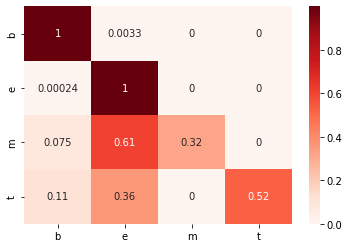

In [159]:
show_confusion_matrix(train_y, predict_train)

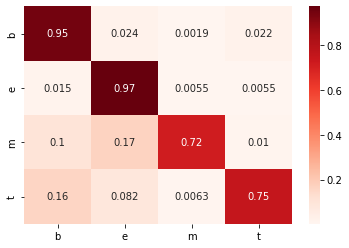

In [160]:
show_confusion_matrix(valid_y, predict_valid)

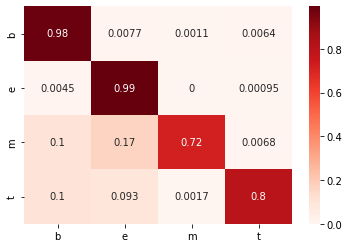

In [161]:
show_confusion_matrix(train_y, predict_train_tfidf)

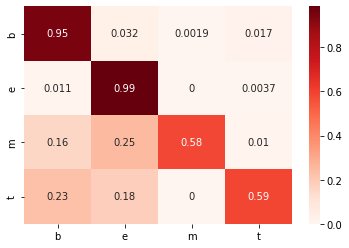

In [162]:
show_confusion_matrix(valid_y, predict_valid_tfidf)

In [100]:
!cut -f 2 work/valid_data.txt | grep b | wc -l

535


In [101]:
!cut -f 2 work/valid_data.txt | grep e | wc -l

547


In [102]:
!cut -f 2 work/valid_data.txt | grep m | wc -l

96


In [103]:
!cut -f 2 work/valid_data.txt | grep t | wc -l

158


### 56. 適合率，再現率，F1スコアの計測
52で学習したロジスティック回帰モデルの適合率，再現率，F1スコアを，評価データ上で計測せよ．カテゴリごとに適合率，再現率，F1スコアを求め，カテゴリごとの性能をマイクロ平均（micro-average）とマクロ平均（macro-average）で統合せよ

In [183]:
from sklearn.metrics import precision_score, recall_score, f1_score
# 各カテゴリのやつ
def show_scores(valid_y, predict_valid):
    prec = precision_score(valid_y, predict_valid, average=None, labels=['b', 'e', 't', 'm'])
    rec = recall_score(valid_y, predict_valid, average=None, labels=['b', 'e', 't', 'm'])
    f1 = f1_score(valid_y, predict_valid, average=None, labels=['b', 'e', 't', 'm'])

    # micro平均
    micro_prec = precision_score(valid_y, predict_valid, average='micro')
    micro_rec = recall_score(valid_y, predict_valid, average='micro')
    micro_f1 = f1_score(valid_y, predict_valid, average='micro')

    # macro平均
    macro_prec = precision_score(valid_y, predict_valid, average='macro')
    macro_rec = recall_score(valid_y, predict_valid, average='macro')
    macro_f1 = f1_score(valid_y, predict_valid, average='macro')

    table = pd.DataFrame([prec, rec, f1], index=['適合率', '再現率', 'F1スコア'], columns=['b', 'e', 't', 'm'])
    table_mi = pd.DataFrame([[micro_prec, micro_rec, micro_f1]], index=['micro平均'], columns=['適合率', '再現率', 'F1スコア'])
    table_ma = pd.DataFrame([[macro_prec, macro_rec, macro_f1]], index=['macro平均'], columns=['適合率', '再現率', 'F1スコア'])
    table_m = pd.concat([table_mi, table_ma])
    display(table)
    display(table_m)

In [184]:
show_scores(valid_y, predict_valid)

,b,e,t,m
適合率,0.922101,0.926957,0.881481,0.932432
再現率,0.951402,0.974406,0.753165,0.718750
F1スコア,0.936523,0.950089,0.812287,0.811765


,適合率,再現率,F1スコア
micro平均,0.920659,0.920659,0.920659
macro平均,0.915743,0.849431,0.877666


In [185]:
show_scores(valid_y, predict_valid_tfidf)

,b,e,t,m
適合率,0.899115,0.885057,0.885714,0.982456
再現率,0.949533,0.985375,0.588608,0.583333
F1スコア,0.923636,0.932526,0.707224,0.732026


,適合率,再現率,F1スコア
micro平均,0.895210,0.895210,0.895210
macro平均,0.913086,0.776712,0.823853


### 57. 特徴量の重みの確認
52で学習したロジスティック回帰モデルの中で，重みの高い特徴量トップ10と，重みの低い特徴量トップ10を確認せよ

In [107]:
import pandas as pd
classes = model.classes_
coefs = model.coef_
features = vectorizer.get_feature_names_out()

for cl, co in zip(classes, coefs):
    top10_ind = np.argsort(co)[::-1][:10]
    top10 = [features[i] for i in top10_ind]
    df_top = pd.DataFrame(top10, columns=['TOP10'], index=[f'{i}位' for i in range(1,11)])

    worst10_ind = np.argsort(co)[:10]
    worst10 = [features[i] for i in worst10_ind]
    df_worst = pd.DataFrame(worst10, columns=['WORST10'], index=[f'{i}位' for i in range(1,11)])

    print(f'【カテゴリ】{cl}')
    display(df_top.T)   # Tは転置
    display(df_worst.T)

【カテゴリ】b


,1位,2位,3位,4位,5位,6位,7位,8位,9位,10位
TOP10,bank,fed,ecb,ukraine,argentina,obamacare,china,yellen,stocks,buy


,1位,2位,3位,4位,5位,6位,7位,8位,9位,10位
WORST10,activision,aereo,ebola,nintendo,mother,cap,heartbleed,virus,drug,victims


【カテゴリ】e


,1位,2位,3位,4位,5位,6位,7位,8位,9位,10位
TOP10,chris,kardashian,paul,miley,trailer,beyonce,cyrus,thrones,kim,film


,1位,2位,3位,4位,5位,6位,7位,8位,9位,10位
WORST10,google,china,study,facebook,billion,gm,microsoft,data,obamacare,oil


【カテゴリ】m


,1位,2位,3位,4位,5位,6位,7位,8位,9位,10位
TOP10,ebola,fda,cancer,mers,cases,study,brain,drug,aids,health


,1位,2位,3位,4位,5位,6位,7位,8位,9位,10位
WORST10,gm,twitter,facebook,dimon,ceo,climate,apple,amazon,profit,sell


【カテゴリ】t


,1位,2位,3位,4位,5位,6位,7位,8位,9位,10位
TOP10,google,facebook,apple,microsoft,climate,activision,nasa,tesla,heartbleed,fcc


,1位,2位,3位,4位,5位,6位,7位,8位,9位,10位
WORST10,stocks,percent,grows,close,fed,men,american,upholds,deals,kids


### 58. 正則化パラメータの変更
ロジスティック回帰モデルを学習するとき，正則化パラメータを調整することで，学習時の過学習（overfitting）の度合いを制御できる．異なる正則化パラメータでロジスティック回帰モデルを学習し，学習データ，検証データ，および評価データ上の正解率を求めよ．実験の結果は，正則化パラメータを横軸，正解率を縦軸としたグラフにまとめよ

In [143]:
import matplotlib.pyplot as plt
def show_train_result(train_data, valid_data, test_data, train_X, valid_X, test_X):
    train_y = train_data['CATEGORY']
    valid_y = valid_data['CATEGORY']
    test_y = test_data['CATEGORY']

    result = {'train' : {}, 'valid' : {}, 'test' : {}}

    for i in range(7):
        c = 10**(i-3)
        model = LogisticRegression(C=c, max_iter=1000, random_state=1234)
        model.fit(train_X, train_y)
        train_predict = model.predict(train_X)
        valid_predict = model.predict(valid_X)
        test_predict = model.predict(test_X)
        result['train'][c] = accuracy_score(train_y, train_predict)
        result['valid'][c] = accuracy_score(valid_y, valid_predict)
        result['test'][c] = accuracy_score(test_y, test_predict)
        
    plt.plot(result['train'].keys(), result['train'].values(), label = "train")
    plt.plot(result['valid'].keys(), result['valid'].values(), label = "valid")
    plt.plot(result['test'].keys(), result['test'].values(), label = "test")

    plt.legend(bbox_to_anchor=(0.90, 0.40), loc='lower right', borderaxespad=-2, fontsize=14)

    plt.xlabel("C")
    plt.ylabel("accuracys")
    plt.xscale('log')
    plt.show()

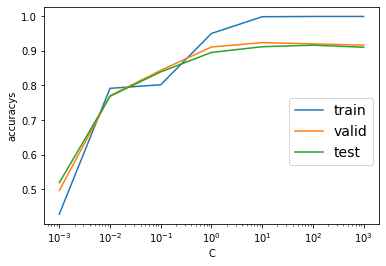

In [144]:
show_train_result(train_data, valid_data, test_data, train_X, valid_X, test_X)

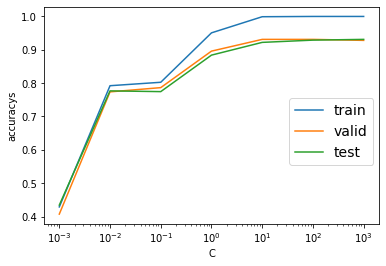

In [145]:
show_train_result(train_data, valid_data, test_data, tfidf_train_X, tfidf_valid_X, tfidf_test_X)

### 59. ハイパーパラメータの探索
学習アルゴリズムや学習パラメータを変えながら，カテゴリ分類モデルを学習せよ．検証データ上の正解率が最も高くなる学習アルゴリズム・パラメータを求めよ．また，その学習アルゴリズム・パラメータを用いたときの評価データ上の正解率を求めよ．

In [130]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
test_y = test_data['CATEGORY']

def grid_search(train, valid, test):
    model = LogisticRegression(solver='lbfgs')
    param_grid = {'C': [10**i for i in range(-3, 4)],
                'max_iter': list(range(1000, 5000, 100))}
    grid_search = GridSearchCV(estimator = model, 
                                    param_grid = param_grid,  # チューニングするパラメータ
                                    scoring = 'accuracy'  # スコアリング
                                    )
    grid_search.fit(valid, valid_y)

    best_model = LogisticRegression(**grid_search.best_params_)
    best_model.fit(train, train_y)
    pred = best_model.predict(test)


    print(f"ベストスコア:{grid_search.best_score_}")
    print(f"パラメーター:{grid_search.best_params_}")
    print(f"テストスコア:{accuracy_score(test_y, pred)}")

    defoult_model = LogisticRegression(max_iter=1000)
    defoult_model.fit(train, train_y)
    defoult_pred = defoult_model.predict(test)
    print(f"デフォルトモデルのテストスコア:{accuracy_score(test_y, defoult_pred)}")

In [131]:
test_y = test_data['CATEGORY']
grid_search(train_X, valid_X, test_X)

ベストスコア:0.8248504667672872
パラメーター:{'C': 10, 'max_iter': 1000}
テストスコア:0.9116766467065869
デフォルトモデルのテストスコア:0.8952095808383234


In [132]:
grid_search(tfidf_train_X, tfidf_valid_X, tfidf_test_X)

ベストスコア:0.8240958130694841
パラメーター:{'C': 1000, 'max_iter': 1000}
テストスコア:0.9303892215568862
デフォルトモデルのテストスコア:0.8832335329341318


In [149]:
from sklearn.svm import LinearSVC

def grid_search_svm(train, valid, test):
    model = LinearSVC()
    param_grid = {'C': [10**i for i in range(-3, 4)],
                'max_iter': list(range(9000, 14000, 100))}
    grid_search = GridSearchCV(estimator = model, 
                                    param_grid = param_grid,  # チューニングするパラメータ
                                    scoring = 'accuracy'  # スコアリング
                                    )
    grid_search.fit(valid, valid_y)

    best_model = LogisticRegression(**grid_search.best_params_)
    best_model.fit(train, train_y)
    pred = best_model.predict(test)

    print(f"ベストスコア:{grid_search.best_score_}")
    print(f"パラメーター:{grid_search.best_params_}")
    print(f"テストスコア:{accuracy_score(test_y, pred)}")

    defoult_model = LogisticRegression(max_iter=1000)
    defoult_model.fit(train, train_y)
    defoult_pred = defoult_model.predict(test)
    print(f"デフォルトモデルのテストスコア:{accuracy_score(test_y, defoult_pred)}")

In [150]:
grid_search_svm(train_X, valid_X, test_X)

ベストスコア:0.8285901950919559
パラメーター:{'C': 0.1, 'max_iter': 9000}
テストスコア:0.8390718562874252
デフォルトモデルのテストスコア:0.8952095808383234


In [151]:
grid_search_svm(tfidf_train_X, tfidf_valid_X, tfidf_test_X)

ベストスコア:0.8278327463804572
パラメーター:{'C': 10, 'max_iter': 9000}
テストスコア:0.9214071856287425
デフォルトモデルのテストスコア:0.8832335329341318
